# The Titanic Competition
## Did they sink or swim?
This is my first Kaggle notebook and submission; I am excited! 
### The problem
This dataset contains info about boarders of the titanic ship. Our goal is to use this data to find trends which determine whether people survived the disaster.
### My assumptions
From the first look at the data, it seems as though factors such as Age, Class and Gender play a pivitol role in determining survival.

### Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression,SGDClassifier 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
sns.set_palette("Set2", 8, .75)

### Load the data

In [4]:
dataset = pd.read_csv('/kaggle/input/titanic/train.csv')
test_dataset = pd.read_csv('/kaggle/input/titanic/test.csv')

## EDA

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### PClass

**It's obvious that "Pclass" is an important feature. It makes sense as the people who likely accessed the lifeboats were of upper class.**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

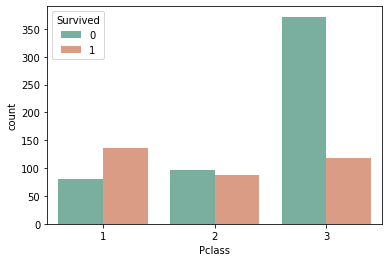

In [8]:
sns.countplot(x='Pclass', data=dataset, hue='Survived')

**combine class with gender**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

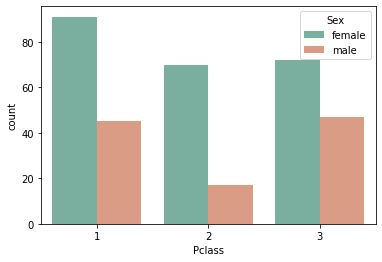

In [9]:
sns.countplot(x='Pclass', data=dataset[dataset['Survived']==1], hue='Sex')

The more likey surviors were females of any class. 

#### Gender

<AxesSubplot:xlabel='Pclass', ylabel='count'>

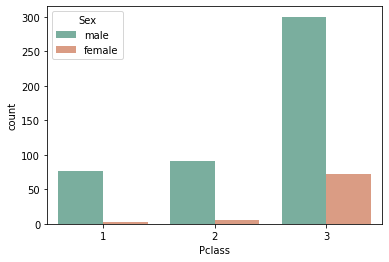

In [10]:
sns.countplot(x='Pclass', data=dataset[dataset['Survived']==0], hue='Sex')

It seems like most women survived regardless of class.

<AxesSubplot:xlabel='Sex', ylabel='count'>

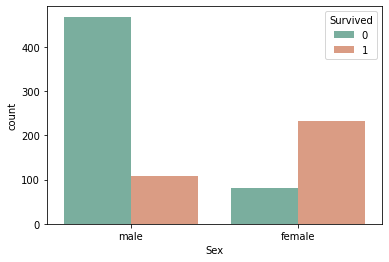

In [11]:
sns.countplot(x='Sex', data=dataset, hue='Survived')

#### Age

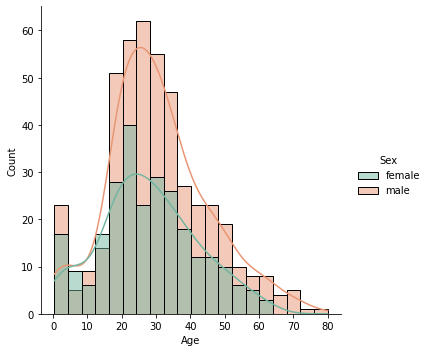

In [12]:
sns.displot(data=dataset,x='Age', hue='Sex',  hue_order=['female','male'], kde=True)

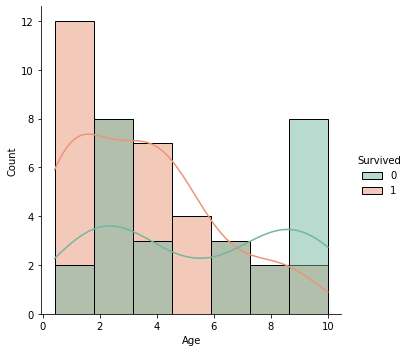

In [13]:
sns.displot(data=dataset[dataset['Age']<=10],x='Age', hue='Survived', kde=True)

A lot of children survived.

#### Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

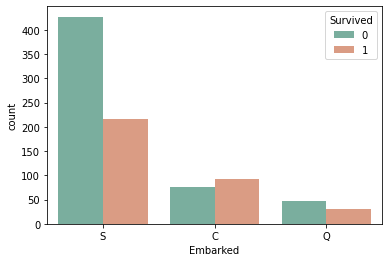

In [14]:
sns.countplot(x='Embarked', data=dataset, hue='Survived')

The route was S -> C -> Q which is reflected in the amount of people who boarded from there ports respectively.

#### Cabins

<AxesSubplot:xlabel='cabin_known', ylabel='count'>

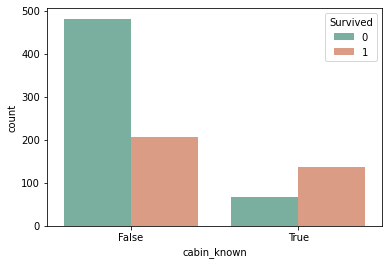

In [15]:
dataset['cabin_known'] = dataset['Cabin'].apply(lambda x: False if pd.isnull(x) else True)
sns.countplot(x='cabin_known', data=dataset, hue='Survived')

<AxesSubplot:xlabel='cabin_known', ylabel='count'>

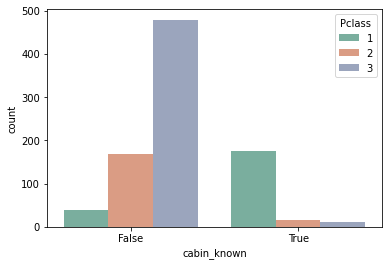

In [16]:
sns.countplot(x='cabin_known', data=dataset, hue='Pclass')

* Knowing cabin in not related to class.
* can consider dropping cabin column or looking into the seperation of decks

#### Fare

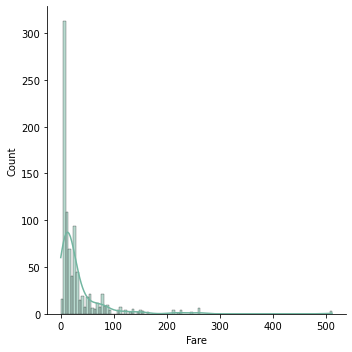

In [17]:
sns.displot(data=dataset,x='Fare', kde=True)

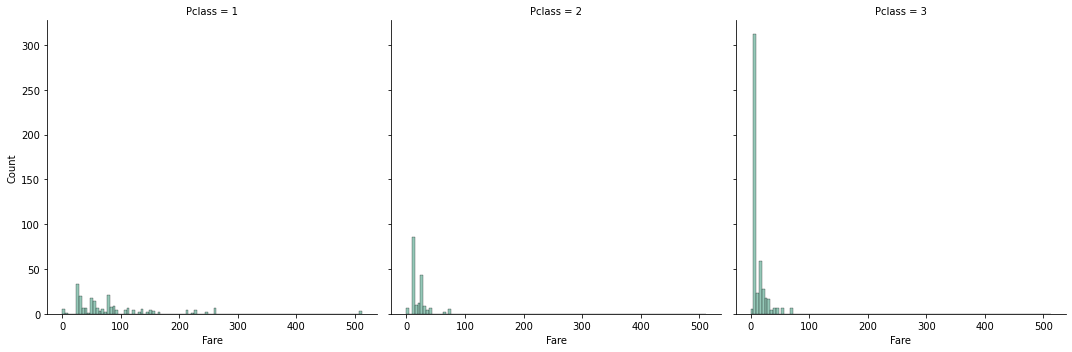

In [18]:
sns.displot(data=dataset,x='Fare', col='Pclass')

#### Family Relations

<AxesSubplot:xlabel='SibSp', ylabel='count'>

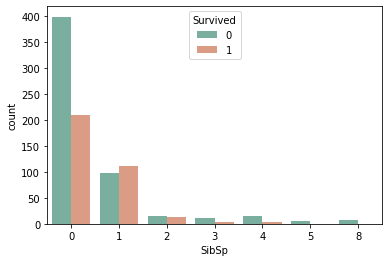

In [19]:
sns.countplot(x='SibSp', data=dataset, hue='Survived')

Having a sibling/spouse was not much of a guarantee to surviving.

<AxesSubplot:xlabel='Parch', ylabel='count'>

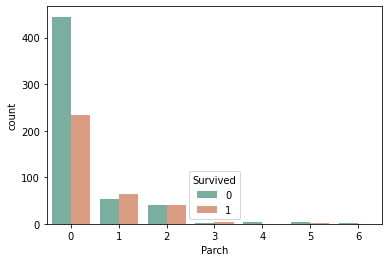

In [20]:
sns.countplot(x='Parch', data=dataset, hue='Survived')

Having a parent/child was not much of a guarantee to surviving.

### Preprocessing and cleaning the data

#### Extracting title from the Name

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Mr.'),
  Text(1, 0, 'Mrs.'),
  Text(2, 0, 'Miss.'),
  Text(3, 0, 'Master.'),
  Text(4, 0, 'Don.'),
  Text(5, 0, 'Rev.'),
  Text(6, 0, 'Dr.'),
  Text(7, 0, 'Mme.'),
  Text(8, 0, 'Ms.'),
  Text(9, 0, 'Major.'),
  Text(10, 0, 'Lady.'),
  Text(11, 0, 'Sir.'),
  Text(12, 0, 'Mlle.'),
  Text(13, 0, 'Col.'),
  Text(14, 0, 'Capt.'),
  Text(15, 0, ' '),
  Text(16, 0, 'Jonkheer.')])

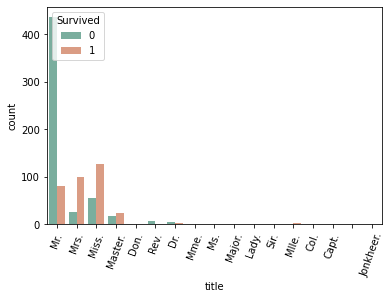

In [21]:
dataset['title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split()[0])
dataset['title'] = dataset['title'].apply(lambda x: x if x[-1] == '.' else ' ')
test_dataset['title'] = test_dataset['Name'].apply(lambda x: x.split(',')[1].split()[0])
test_dataset['title'] = test_dataset['title'].apply(lambda x: x if x[-1] == '.' else ' ')
sns.countplot(x='title' , hue = 'Survived',data=dataset)
plt.xticks(rotation=70)

In [22]:
dataset['title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
               1
Capt.          1
Don.           1
Jonkheer.      1
Ms.            1
Sir.           1
Mme.           1
Lady.          1
Name: title, dtype: int64

In [23]:
dataset['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', ' ',
       'Jonkheer.'], dtype=object)

In [24]:
title_dict = {'Don.':'other', 'Rev.':'other', 'Dr.':'other', 'Major.':'other', 'Lady.':'other', 'Sir.':'other', 'Col.':'other',
              'Capt.':'other', ' ':'other','Jonkheer.':'other', 'Mlle.': 'Miss.','Mme.': 'Mrs.', 'Mr.':'Mr.', 'Miss.':'Miss.',
             'Mrs.':'Mrs.', 'Master.':'Master.', 'Ms.':'Mrs.'}

In [25]:
dataset['title'] = dataset['title'].map(title_dict)
test_dataset['title'] = test_dataset['title'].map(title_dict)

In [26]:
dataset['title'] = dataset['title'].fillna('other')
test_dataset['title'] = test_dataset['title'].fillna('other')

In [27]:
enc_4 = OrdinalEncoder()
dataset['title'] = enc_4.fit_transform(np.array(dataset['title']).reshape(-1,1))
test_dataset['title'] = enc_4.transform(np.array(test_dataset['title']).reshape(-1,1))

#### Binary encoding the Sex

In [28]:
dataset['Male'] = dataset['Sex'].map( {'male':1, 'female':0} ) 
test_dataset['Male'] = test_dataset['Sex'].map( {'male':1, 'female':0} ) 

#### Complete the Age column

In [29]:
dataset[dataset['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_known,title,Male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False,2.0,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,False,2.0,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,False,3.0,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,False,2.0,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,False,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,False,2.0,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,False,1.0,0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,False,2.0,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,False,2.0,1


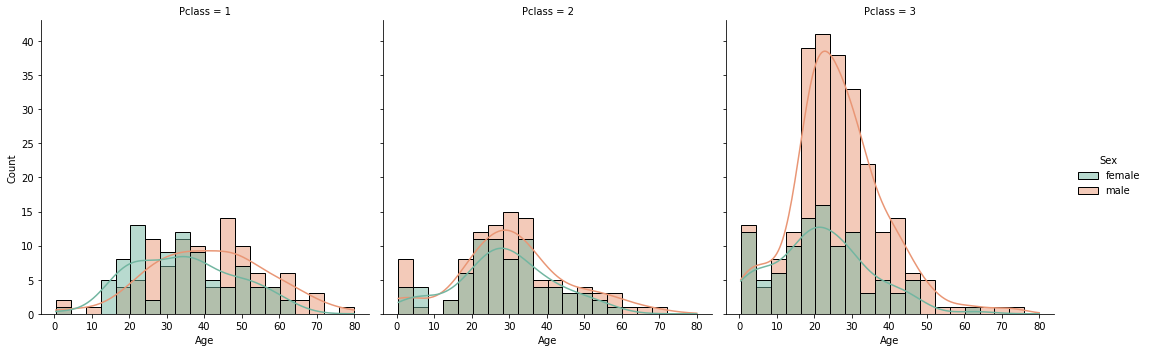

In [30]:
sns.displot(data=dataset,x='Age', hue='Sex',  hue_order=['female','male'],col='Pclass',  kde=True)

In [31]:
for i in dataset['Pclass'].unique():
    for j in dataset['Sex'].unique():
        dataset.loc[(dataset['Pclass']==i) & (dataset['Sex']==j) & (dataset['Age'].isna()), 'Age'] = dataset[(dataset['Pclass']==i) & (dataset['Sex']==j)]['Age'].median()
        test_dataset.loc[(test_dataset['Pclass']==i) & (test_dataset['Sex']==j) & (test_dataset['Age'].isna()),'Age'] = dataset[(dataset['Pclass']==i) & (dataset['Sex']==j)]['Age'].median()

**Based on the median of the age per class and sex**

#### Seperate Age into buckets

In [32]:
def divide_buckets(x,x_intervals):
    for x_interval in x_intervals:
        if x in x_interval:
            return x_interval

In [33]:
l = pd.qcut(dataset['Age'], 5).value_counts().index.tolist()
l[2] = pd.Interval(0,l[2].right) # make it begin at zero
dataset['Age_bucket'] = dataset['Age'].apply(lambda x: divide_buckets(x,l))
test_dataset['Age_bucket'] = test_dataset['Age'].apply(lambda x: divide_buckets(x,l))

In [34]:
enc = OrdinalEncoder()
dataset['Age_bucket'] = enc.fit_transform(np.array(dataset['Age_bucket']).reshape(-1,1))
test_dataset['Age_bucket'] = enc.transform(np.array(test_dataset['Age_bucket']).reshape(-1,1))

#### Complete the Embarked column

In [35]:
dataset[dataset['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_known,title,Male,Age_bucket
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,True,1.0,0,3.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,True,3.0,0,4.0


In [36]:
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])
test_dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

fill missing (2 rows) with the most common boarding port.

In [37]:
dataset['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
enc_2 = OrdinalEncoder()
dataset['Embarked'] = enc_2.fit_transform(np.array(dataset['Embarked']).reshape(-1,1))
test_dataset['Embarked'] = enc_2.transform(np.array(test_dataset['Embarked']).reshape(-1,1))

#### Complete the Fare column

In [39]:
for i in dataset['Pclass'].unique():
    dataset.loc[(dataset['Pclass']==i) & (dataset['Fare'].isna()), 'Fare'] = dataset[(dataset['Pclass']==i)]['Fare'].mode()[0]
    test_dataset.loc[(test_dataset['Pclass']==i) & (test_dataset['Fare'].isna()),'Fare'] = dataset[(dataset['Pclass']==i)]['Fare'].mode()[0]

#### Get the family status

In [40]:
dataset['Family_size'] = dataset['SibSp'] + dataset['Parch'] + 1
test_dataset['Family_size'] = test_dataset['SibSp'] + test_dataset['Parch'] + 1

In [41]:
dataset['IsAlone'] = dataset['Family_size'].apply(lambda x: x ==1 )
test_dataset['IsAlone'] = test_dataset['Family_size'].apply(lambda x: x ==1 )

In [42]:
dataset['IsAlone'] = dataset['IsAlone'].map( {True:1, False:0} ) 
test_dataset['IsAlone'] = test_dataset['IsAlone'].map( {True:1, False:0} ) 

#### Split fare into buckets

In [43]:
l = pd.qcut(dataset['Fare'],4).value_counts().index.tolist()
l[3] =pd.Interval(l[3].left, np.inf )

In [44]:
dataset['Fare_bucket']= dataset['Fare'].apply(lambda x: divide_buckets(x,l))
test_dataset['Fare_bucket']=  test_dataset['Fare'].apply(lambda x: divide_buckets(x,l))

In [45]:
enc_3 = OrdinalEncoder()
dataset['Fare_bucket'] = enc_3.fit_transform(np.array(dataset['Fare_bucket']).reshape(-1,1))
test_dataset['Fare_bucket'] = enc_3.transform(np.array(test_dataset['Fare_bucket']).reshape(-1,1))

#### Combine Age and Pclass

In [46]:
dataset['Age_Class'] = dataset['Age_bucket'] * dataset['Pclass']
test_dataset['Age_Class'] = test_dataset['Age_bucket'] * test_dataset['Pclass']

### Feature Importance

In [47]:
X_train = dataset[['PassengerId', 'Pclass', 'Age', 'SibSp','Parch', 'Fare', 'Embarked', 'cabin_known', 'title',
       'Male', 'Age_bucket', 'Family_size', 'IsAlone', 'Fare_bucket','Age_Class']]
y_train = dataset['Survived']
logreg = LogisticRegression().fit(X_train, y_train)
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Feature,Correlation
13,Age_Class,0.770506
7,title,0.639081
10,Family_size,0.575902
1,Age,0.211046
0,Pclass,0.000615
5,Embarked,0.000088
4,Fare,-0.037667
2,SibSp,-0.042246
6,cabin_known,-0.051046
8,Male,-0.065174


### Prepare training and testing datasets

In [48]:
feats = [ 'Embarked', 'title','Male', 'Family_size', 'IsAlone', 'Fare_bucket', 'Age_bucket', 'Pclass','Age_Class']
X_train = dataset[feats]
X_test = test_dataset[feats]
y_train= dataset['Survived']

### Try different classification models

In [49]:
models = [('Logistic Regression',LogisticRegression()),
          ('Support Vector', SVC()),
          ('KNN', KNeighborsClassifier(n_neighbors = 3)),
         ('Naive Bayes', GaussianNB()),
         ('Linear Support Vector', LinearSVC()),
         ('Stochastic Gradient Descent', SGDClassifier()),
         ('Decision Trees', DecisionTreeClassifier()),
         ('Random Forest', RandomForestClassifier(n_estimators=100)),
         ('Ada Boost', AdaBoostClassifier(n_estimators=100)),
         ('Gradient Boost', GradientBoostingClassifier(n_estimators=100)),
         ('Extra trees', ExtraTreesClassifier(n_estimators=100))]

In [50]:
models_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Y_pred'])
for name,model in models:
    d = dict()
    d['Model'] = name
    model.fit(X_train, y_train)
    d['Y_pred']=model.predict(X_test)
    d['Accuracy']=model.score(X_train, y_train)
    models_df = models_df.append(d,ignore_index=True)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [51]:
models_df.sort_values('Accuracy', ascending=False)

,Model,Accuracy,Y_pred
6,Decision Trees,0.898990,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ..."
7,Random Forest,0.898990,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."
10,Extra trees,0.898990,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ..."
2,KNN,0.860831,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, ..."
9,Gradient Boost,0.857464,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."
1,Support Vector,0.837262,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, ..."
8,Ada Boost,0.823793,"[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."
5,Stochastic Gradient Descent,0.805836,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, ..."
3,Naive Bayes,0.801347,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, ..."
4,Linear Support Vector,0.800224,"[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."


**Conclusion**\
The ensemble models preformed better in terms of accuracy with ~90% accuracy. So what to pick? \
Extra trees models are less sensitive to noise and have low variance.\
**drum roll**
My pick: Extra trees\
Note: Since Decision trees models are usually consist of a single tree, I will an ensemble model instead. \

In [52]:
y_pred = models_df[models_df['Model']=='Extra trees']['Y_pred'].values[0]

### Submission

In [53]:
submission = pd.DataFrame({
        "PassengerId": test_dataset["PassengerId"],
        "Survived": y_pred
    })

In [54]:
submission.to_csv('submission.csv', index=False)

In [56]:
from IPython.display import FileLink
FileLink(r'submission.csv')

/kaggle/working/submission.csv